In [1]:
# Sample API
import flowx
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 100, 100
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.001
tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=10.0, dt=0.001, Re=100.0)

In [3]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

poisson_options = dict(maxiter = 2000, tol = 1e-9)
poisson_options['lu'], poisson_options['mtx'] = flowx.poisson.build_sparse(gridc, 'pres')

# AB2 starter
# Predictor Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'predictor')

# Divergence Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'divergence')

# Solve the pressure Poisson equation 
scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', poisson_options)

# Corrector Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'corrector')

scalars.advance()

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Predictor Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'predictor')

    # Divergence Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'divergence')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                             poisson_options)
    
    # Corrector Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'corrector')
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)

    scalars.advance()

------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.549320874866327e-10
Max, Min, U   : 2.0, -0.10729210639061476
Max, Min, V   : 0.2726468453420061, -0.2726468453420061
Max, Min, P   : 3.248925456537855, -2.9183224579578617
Max, Min, DIV : 1.8207657603852567e-14, -1.942890293094024e-14


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0595319891859779e-10
Max, Min, U   : 2.0, -0.12427804401877088
Max, Min, V   : 0.2876027199865146, -0.3053310789347202
Max, Min, P   : 2.948812795608891, -2.546390127771206
Max, Min, DIV : 1.1102230246251565e-14, -1.1102230246251565e-14


------------ Time = 0.03000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.995934203169446e-11
Max, Min, U   : 2.0, -0.13063283248341692
Max, Min, V   : 0.2940281895720367, -0.32947942394662977
Max, Min, P   : 2.8451785825017106, -

------------ Time = 0.2700000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.539904556676342e-11
Max, Min, U   : 2.0, -0.166836677043702
Max, Min, V   : 0.3125571661213093, -0.43116572544843407
Max, Min, P   : 2.733284331294935, -2.042353774597566
Max, Min, DIV : 1.0984269049885143e-14, -1.0658141036401503e-14


------------ Time = 0.2800000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4166658994402144e-11
Max, Min, U   : 2.0, -0.16783829515291537
Max, Min, V   : 0.31249541669893555, -0.4332143074033444
Max, Min, P   : 2.7361242851573504, -2.038333868804553
Max, Min, DIV : 1.2434497875801753e-14, -1.0803857808383555e-14


------------ Time = 0.2900000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3483899870292985e-11
Max, Min, U   : 2.0, -0.16860679796535694
Max, Min, V   : 0.31242945290161367, -0.43513257003043365
Max, Min, P   : 2.737369741292425, -2.

------------ Time = 0.5200000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.429282284043095e-11
Max, Min, U   : 2.0, -0.18554454284190158
Max, Min, V   : 0.3109651339462085, -0.4616892954122999
Max, Min, P   : 2.7662844846195083, -2.0044013392800926
Max, Min, DIV : 1.2434497875801753e-14, -1.0658141036401503e-14


------------ Time = 0.5300000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4347420185437134e-11
Max, Min, U   : 2.0, -0.18615334049904822
Max, Min, V   : 0.31091801560423604, -0.4625339316244058
Max, Min, P   : 2.7679138444624423, -2.0030486984021745
Max, Min, DIV : 1.3100631690576847e-14, -1.0658141036401503e-14


------------ Time = 0.5400000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.200867808253191e-11
Max, Min, U   : 2.0, -0.1867315991409757
Max, Min, V   : 0.3108723049995199, -0.46355612243718025
Max, Min, P   : 2.7694024775252637, -

------------ Time = 0.7500000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0357574762766435e-11
Max, Min, U   : 2.0, -0.1990546403960866
Max, Min, V   : 0.3101731646882287, -0.4796869591769884
Max, Min, P   : 2.7894056256308155, -1.9892315418390656
Max, Min, DIV : 1.176836406102666e-14, -9.610368056911511e-15


------------ Time = 0.7600000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6915020676603744e-11
Max, Min, U   : 2.0, -0.1995593337434943
Max, Min, V   : 0.31014953174850823, -0.48031176116255414
Max, Min, P   : 2.789643659122579, -1.9893639015528923
Max, Min, DIV : 1.2434497875801753e-14, -1.0248746296070976e-14


------------ Time = 0.7700000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0884404705721006e-11
Max, Min, U   : 2.0, -0.20016412825317303
Max, Min, V   : 0.31012656495733276, -0.4809189394935004
Max, Min, P   : 2.790095171605035, -1.

------------ Time = 0.9900000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.767261164509562e-11
Max, Min, U   : 2.0, -0.2101323292340775
Max, Min, V   : 0.3097517609185091, -0.49138943835546134
Max, Min, P   : 2.8042281630605514, -1.9828580379879077
Max, Min, DIV : 1.0658141036401503e-14, -1.0769163338864018e-14


------------ Time = 1.0000000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.827407814381775e-11
Max, Min, U   : 2.0, -0.21052757022855562
Max, Min, V   : 0.3097392692725291, -0.4919063585415867
Max, Min, P   : 2.8047198577417425, -1.9826911920511827
Max, Min, DIV : 1.1102230246251565e-14, -1.1102230246251565e-14


------------ Time = 1.0099999999999996 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.965210069369194e-11
Max, Min, U   : 2.0, -0.21089790371652786
Max, Min, V   : 0.3097270772052092, -0.49241156436330125
Max, Min, P   : 2.8056268228966004, -1

------------ Time = 1.2199999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.187013605556568e-11
Max, Min, U   : 2.0, -0.2179172717259081
Max, Min, V   : 0.3095261028053985, -0.5008229498692593
Max, Min, P   : 2.8156063273758916, -1.9783233734201073
Max, Min, DIV : 1.4210854715202004e-14, -1.0658141036401503e-14


------------ Time = 1.2299999999999753 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.546714425217156e-11
Max, Min, U   : 2.0, -0.21823776308119364
Max, Min, V   : 0.3095186048518198, -0.5011386757186395
Max, Min, P   : 2.8160701524411995, -1.978128053445929
Max, Min, DIV : 1.049160758270773e-14, -1.0547118733938987e-14


------------ Time = 1.2399999999999742 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0466280154468504e-11
Max, Min, U   : 2.0, -0.21854194919552297
Max, Min, V   : 0.3095112546344303, -0.5014481698704389
Max, Min, P   : 2.816660170509123, -1.977

------------ Time = 1.469999999999949 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.826729213402764e-11
Max, Min, U   : 2.0, -0.2241135668086481
Max, Min, V   : 0.30937458915904026, -0.5071569409828071
Max, Min, P   : 2.824095634862187, -1.9758985932145865
Max, Min, DIV : 1.0436096431476471e-14, -1.176836406102666e-14


------------ Time = 1.4799999999999478 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.96702292587819e-11
Max, Min, U   : 2.0, -0.22429664306368904
Max, Min, V   : 0.30936975690161705, -0.5073550256856209
Max, Min, P   : 2.8242757224264743, -1.975935078384119
Max, Min, DIV : 1.1546319456101628e-14, -1.2434497875801753e-14


------------ Time = 1.4899999999999467 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.022360688326926e-11
Max, Min, U   : 2.0, -0.22446940064861903
Max, Min, V   : 0.309364996802931, -0.5075497021715843
Max, Min, P   : 2.8251596233289917, -1.97526

------------ Time = 1.7199999999999214 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5427437449302516e-11
Max, Min, U   : 2.0, -0.22849934018356075
Max, Min, V   : 0.3092715033123006, -0.5121706502160639
Max, Min, P   : 2.831279626482097, -1.973620568232022
Max, Min, DIV : 1.1102230246251565e-14, -1.2434497875801753e-14


------------ Time = 1.7299999999999203 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.881157376785868e-11
Max, Min, U   : 2.0, -0.228627320499195
Max, Min, V   : 0.3092679913544037, -0.5123634165159604
Max, Min, P   : 2.8318909683808555, -1.9731852363119875
Max, Min, DIV : 1.2212453270876722e-14, -1.0630385460785874e-14


------------ Time = 1.7399999999999192 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0065208252278684e-11
Max, Min, U   : 2.0, -0.22874850592744286
Max, Min, V   : 0.30926451564076735, -0.5125533084973247
Max, Min, P   : 2.8321525113321346, -1.9

------------ Time = 1.9799999999998927 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0916112958443866e-11
Max, Min, U   : 2.0, -0.23171696785939527
Max, Min, V   : 0.30918978625412036, -0.5163752699456814
Max, Min, P   : 2.8369904716442593, -1.9720606014733981
Max, Min, DIV : 1.1546319456101628e-14, -1.0658141036401503e-14


------------ Time = 1.9899999999998916 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.750958514855467e-11
Max, Min, U   : 2.0, -0.23181936847135134
Max, Min, V   : 0.30918695860811585, -0.5165084113591376
Max, Min, P   : 2.836711726687272, -1.972482786005407
Max, Min, DIV : 1.1102230246251565e-14, -2.1316282072803006e-14


------------ Time = 1.9999999999998905 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.281487856220405e-11
Max, Min, U   : 2.0, -0.231917176145831
Max, Min, V   : 0.30918414881596346, -0.5166397755801856
Max, Min, P   : 2.836342554704515, -1.9

------------ Time = 2.2399999999998643 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.611193758266435e-11
Max, Min, U   : 2.0, -0.23385855355187748
Max, Min, V   : 0.3091210043966802, -0.5193306825307733
Max, Min, P   : 2.840319806421789, -1.9721309669448863
Max, Min, DIV : 1.4210854715202004e-14, -1.0436096431476471e-14


------------ Time = 2.249999999999863 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.286476773652002e-11
Max, Min, U   : 2.0, -0.23394235748216274
Max, Min, V   : 0.30911851542222923, -0.5194261498428551
Max, Min, P   : 2.840952891952888, -1.9716160134972827
Max, Min, DIV : 1.0658141036401503e-14, -1.1518563880485999e-14


------------ Time = 2.259999999999862 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.552589294847184e-11
Max, Min, U   : 2.0, -0.23403468953917145
Max, Min, V   : 0.309116035406683, -0.5195204652788574
Max, Min, P   : 2.841888738403575, -1.97079

------------ Time = 2.469999999999839 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.907750167014742e-11
Max, Min, U   : 2.0, -0.2353321321477084
Max, Min, V   : 0.3090656839399723, -0.5213564054127997
Max, Min, P   : 2.8448195925208024, -1.9701445628069874
Max, Min, DIV : 1.2434497875801753e-14, -1.176836406102666e-14


------------ Time = 2.479999999999838 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.226094079726538e-11
Max, Min, U   : 2.0, -0.23540015301009382
Max, Min, V   : 0.30906335524370215, -0.5214441284954966
Max, Min, P   : 2.845062658567283, -1.9700017497109676
Max, Min, DIV : 1.0658141036401503e-14, -1.0255685189974884e-14


------------ Time = 2.489999999999837 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2118295601544266e-11
Max, Min, U   : 2.0, -0.23546585272459197
Max, Min, V   : 0.3090610318396488, -0.521530890493949
Max, Min, P   : 2.8452434261154016, -1.96992

------------ Time = 2.7299999999998104 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9863413316137914e-11
Max, Min, U   : 2.0, -0.23664518578522564
Max, Min, V   : 0.3090066476896604, -0.5233574157652121
Max, Min, P   : 2.8475079594239343, -1.9698505337205716
Max, Min, DIV : 1.3322676295501878e-14, -1.1546319456101628e-14


------------ Time = 2.7399999999998093 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3401559191998904e-11
Max, Min, U   : 2.0, -0.23669593392644617
Max, Min, V   : 0.3090044326065244, -0.5234240734862758
Max, Min, P   : 2.848560811314847, -1.9688815746890884
Max, Min, DIV : 1.176836406102666e-14, -1.1102230246251565e-14


------------ Time = 2.749999999999808 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.56993655254251e-11
Max, Min, U   : 2.0, -0.2367450813088611
Max, Min, V   : 0.30900222123648996, -0.523490061600279
Max, Min, P   : 2.8472497338471636, -1.970

------------ Time = 2.979999999999783 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.043202214760586e-11
Max, Min, U   : 2.0, -0.2375234343542646
Max, Min, V   : 0.30895234631690116, -0.5248416597579331
Max, Min, P   : 2.851215935661904, -1.968081456509604
Max, Min, DIV : 1.1102230246251565e-14, -1.2434497875801753e-14


------------ Time = 2.9899999999997817 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3665277265866005e-11
Max, Min, U   : 2.0, -0.23756438726867118
Max, Min, V   : 0.30895022005036255, -0.5248939345318506
Max, Min, P   : 2.8495264847949717, -1.9698420393517238
Max, Min, DIV : 1.2434497875801753e-14, -1.1546319456101628e-14


------------ Time = 2.9999999999997806 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0863466950030936e-11
Max, Min, U   : 2.0, -0.2376041767259402
Max, Min, V   : 0.3089480973119773, -0.5249457234854575
Max, Min, P   : 2.850425259313984, -1.96

------------ Time = 3.259999999999752 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2042212656635404e-11
Max, Min, U   : 2.0, -0.23829121322679836
Max, Min, V   : 0.3088941849657535, -0.5261395049319746
Max, Min, P   : 2.853030943641148, -1.9680953253424338
Max, Min, DIV : 1.176836406102666e-14, -1.1102230246251565e-14


------------ Time = 3.269999999999751 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2764481716189316e-11
Max, Min, U   : 2.0, -0.23832435685277642
Max, Min, V   : 0.30889216265735064, -0.5261801598277664
Max, Min, P   : 2.8528361822359942, -1.9683495842279064
Max, Min, DIV : 1.1796119636642288e-14, -1.4210854715202004e-14


------------ Time = 3.27999999999975 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.040117635994173e-11
Max, Min, U   : 2.0, -0.23835933946594517
Max, Min, V   : 0.30889014432404827, -0.5262204659725839
Max, Min, P   : 2.854135167580127, -1.967

------------ Time = 3.5199999999997234 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2636104165717655e-11
Max, Min, U   : 2.0, -0.23898219151549616
Max, Min, V   : 0.3088429530858532, -0.5270926257043487
Max, Min, P   : 2.855022490779029, -1.9675365856607894
Max, Min, DIV : 1.0241807402167069e-14, -1.0380585280245214e-14


------------ Time = 3.5299999999997222 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.189788282530312e-11
Max, Min, U   : 2.0, -0.23900034949536836
Max, Min, V   : 0.3088410411726115, -0.527125357617414
Max, Min, P   : 2.853322592262822, -1.969287138934642
Max, Min, DIV : 1.0658141036401503e-14, -1.0769163338864018e-14


------------ Time = 3.539999999999721 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.267401996406263e-11
Max, Min, U   : 2.0, -0.23901797283086734
Max, Min, V   : 0.3088391337960976, -0.5271578269655316
Max, Min, P   : 2.85443987024372, -1.968220

------------ Time = 3.769999999999696 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4712657874599344e-11
Max, Min, U   : 2.0, -0.23943213327634466
Max, Min, V   : 0.3087965615406481, -0.5278380222606831
Max, Min, P   : 2.8550812038524995, -1.968656518471279
Max, Min, DIV : 1.1546319456101628e-14, -1.0658141036401503e-14


------------ Time = 3.7799999999996947 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4540360506257486e-11
Max, Min, U   : 2.0, -0.23945236914364915
Max, Min, V   : 0.30879476881293905, -0.5278649347753853
Max, Min, P   : 2.856934994655137, -1.966846285271595
Max, Min, DIV : 1.0769163338864018e-14, -1.0658141036401503e-14


------------ Time = 3.7899999999996936 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.078422779784204e-11
Max, Min, U   : 2.0, -0.23947217406492444
Max, Min, V   : 0.308792981078307, -0.5278916434757097
Max, Min, P   : 2.8557732929342876, -1.96

------------ Time = 4.019999999999677 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1892100310011946e-11
Max, Min, U   : 2.0, -0.23982323100388586
Max, Min, V   : 0.3087532724320962, -0.5284605141270018
Max, Min, P   : 2.8586004100808973, -1.9661523322705352
Max, Min, DIV : 1.2490009027033011e-14, -1.1102230246251565e-14


------------ Time = 4.0299999999996805 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.391069954312792e-11
Max, Min, U   : 2.0, -0.23983452431896635
Max, Min, V   : 0.30875160840941435, -0.5284910131044985
Max, Min, P   : 2.8558987342239797, -1.9688915788881884
Max, Min, DIV : 1.2434497875801753e-14, -1.0325074129013956e-14


------------ Time = 4.039999999999684 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0323108906041524e-11
Max, Min, U   : 2.0, -0.23984552994868757
Max, Min, V   : 0.30874994967170427, -0.5285212937956668
Max, Min, P   : 2.858098882308848, -1

------------ Time = 4.269999999999761 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.585304118422104e-11
Max, Min, U   : 2.0, -0.24014461682787133
Max, Min, V   : 0.30871327189017944, -0.5291617490830852
Max, Min, P   : 2.857075525151083, -1.9685538153553988
Max, Min, DIV : 1.0658141036401503e-14, -1.0658141036401503e-14


------------ Time = 4.279999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.664537453656472e-11
Max, Min, U   : 2.0, -0.24016067399942495
Max, Min, V   : 0.3087117417043077, -0.5291873316509463
Max, Min, P   : 2.8572937505447604, -1.9683680801842511
Max, Min, DIV : 9.992007221626409e-15, -1.176836406102666e-14


------------ Time = 4.289999999999767 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.419562814259803e-11
Max, Min, U   : 2.0, -0.24017647775545883
Max, Min, V   : 0.3087102169159823, -0.5292127388857841
Max, Min, P   : 2.8588139960908965, -1.96688

------------ Time = 4.4999999999998375 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.6469803742029714e-11
Max, Min, U   : 2.0, -0.24045578352310099
Max, Min, V   : 0.3086794427167373, -0.5297082748123295
Max, Min, P   : 2.859512132652574, -1.9668192493294632
Max, Min, DIV : 1.099120794378905e-14, -1.2434497875801753e-14


------------ Time = 4.509999999999841 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.634375271667731e-11
Max, Min, U   : 2.0, -0.2404668414439832
Max, Min, V   : 0.3086780364848356, -0.5297301725210712
Max, Min, P   : 2.8576225009792364, -1.9687373596028932
Max, Min, DIV : 1.199040866595169e-14, -1.4210854715202004e-14


------------ Time = 4.519999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1427255824343174e-11
Max, Min, U   : 2.0, -0.24047771731008324
Max, Min, V   : 0.30867663561167824, -0.5297519252248838
Max, Min, P   : 2.8596187324183786, -1.966

------------ Time = 4.729999999999914 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.261622514695558e-11
Max, Min, U   : 2.0, -0.2406683661117672
Max, Min, V   : 0.3086484456239682, -0.5301771887717264
Max, Min, P   : 2.859093204337635, -1.9678539769352108
Max, Min, DIV : 1.3766765505351941e-14, -1.2434497875801753e-14


------------ Time = 4.739999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1650414929594387e-11
Max, Min, U   : 2.0, -0.2406758359965647
Max, Min, V   : 0.3086471611880742, -0.5301960249227506
Max, Min, P   : 2.860800220596076, -1.9661719598934444
Max, Min, DIV : 1.2434497875801753e-14, -1.0047518372857667e-14


------------ Time = 4.749999999999921 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.485516222841069e-11
Max, Min, U   : 2.0, -0.24068317539959344
Max, Min, V   : 0.30864588196192094, -0.5302147399803638
Max, Min, P   : 2.861185386473914, -1.965811

------------ Time = 5.000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1578456898225443e-11
Max, Min, U   : 2.0, -0.24094786405587998
Max, Min, V   : 0.3086155669842288, -0.5306458077544468
Max, Min, P   : 2.861735965850193, -1.9658392489349161
Max, Min, DIV : 1.2434497875801753e-14, -1.3766765505351941e-14


------------ Time = 5.010000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.308495511770828e-11
Max, Min, U   : 2.0, -0.24095850849543224
Max, Min, V   : 0.3086144198048276, -0.5306616734984948
Max, Min, P   : 2.8621948714316465, -1.9654018291885558
Max, Min, DIV : 1.0935696792557792e-14, -1.2434497875801753e-14


------------ Time = 5.020000000000011 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4777685202222364e-11
Max, Min, U   : 2.0, -0.24096902867126954
Max, Min, V   : 0.3086132775573316, -0.5306774401932337
Max, Min, P   : 2.8619133194302253, -1.96

------------ Time = 5.260000000000091 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3536287017629695e-11
Max, Min, U   : 2.0, -0.24118792597588296
Max, Min, V   : 0.308587310935962, -0.5310278939144625
Max, Min, P   : 2.860829307188262, -1.9672674259387528
Max, Min, DIV : 1.2878587085651816e-14, -1.1102230246251565e-14


------------ Time = 5.270000000000095 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.134480669195886e-11
Max, Min, U   : 2.0, -0.24119578836739036
Max, Min, V   : 0.308586287897042, -0.5310414011088918
Max, Min, P   : 2.8608181409048825, -1.9672971849941092
Max, Min, DIV : 1.1102230246251565e-14, -1.0658141036401503e-14


------------ Time = 5.280000000000098 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.157004391922651e-11
Max, Min, U   : 2.0, -0.24120356043890592
Max, Min, V   : 0.3085852694542883, -0.5310548259336618
Max, Min, P   : 2.8621685035710325, -1.96596

------------ Time = 5.530000000000181 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.095693352113235e-11
Max, Min, U   : 2.0, -0.24137147584261168
Max, Min, V   : 0.30856126100785636, -0.5313652611555972
Max, Min, P   : 2.8619454179528034, -1.9666189182961757
Max, Min, DIV : 1.2434497875801753e-14, -1.4210854715202004e-14


------------ Time = 5.540000000000185 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.564071395975033e-11
Max, Min, U   : 2.0, -0.2413772456963832
Max, Min, V   : 0.3085603570995199, -0.5313767309732752
Max, Min, P   : 2.8612360578244904, -1.9673442938975918
Max, Min, DIV : 1.1823875212257917e-14, -1.0658141036401503e-14


------------ Time = 5.550000000000188 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.435233221081295e-11
Max, Min, U   : 2.0, -0.24138295037010105
Max, Min, V   : 0.3085594574012087, -0.5313881322432006
Max, Min, P   : 2.861574008620255, -1.9670

------------ Time = 5.770000000000262 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5805169163493655e-11
Max, Min, U   : 2.0, -0.24149343630084225
Max, Min, V   : 0.3085406993554848, -0.5316225028177497
Max, Min, P   : 2.8630499381023027, -1.965875455044022
Max, Min, DIV : 1.0325074129013956e-14, -1.0935696792557792e-14


------------ Time = 5.780000000000265 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.9062081622375e-11
Max, Min, U   : 2.0, -0.24149783778703976
Max, Min, V   : 0.30853989241779595, -0.5316324462804647
Max, Min, P   : 2.8632653976824036, -1.9656740302880957
Max, Min, DIV : 1.9539925233402755e-14, -1.7763568394002505e-14


------------ Time = 5.790000000000268 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.7259563543886504e-11
Max, Min, U   : 2.0, -0.24150219029157408
Max, Min, V   : 0.30853908933582774, -0.5316423311994549
Max, Min, P   : 2.8621992789311883, -1.96

------------ Time = 6.010000000000342 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.6960252941988624e-11
Max, Min, U   : 2.0, -0.24158664636222818
Max, Min, V   : 0.3085223672613645, -0.5318457232152725
Max, Min, P   : 2.863127788935678, -1.966114077273279
Max, Min, DIV : 1.2434497875801753e-14, -1.0769163338864018e-14


------------ Time = 6.020000000000345 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.547329371243686e-11
Max, Min, U   : 2.0, -0.24159001771861208
Max, Min, V   : 0.30852164880940636, -0.5318543603813538
Max, Min, P   : 2.862208493387936, -1.9670456773525316
Max, Min, DIV : 1.0796918914479647e-14, -1.176836406102666e-14


------------ Time = 6.030000000000348 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3345846275524347e-11
Max, Min, U   : 2.0, -0.2415933521234265
Max, Min, V   : 0.3085209338623813, -0.5318629473321793
Max, Min, P   : 2.8624692303693213, -1.96679

Number of poisson iterations    : None
Final poisson residual : 4.510158151391134e-11
Max, Min, U   : 2.0, -0.24174168006054328
Max, Min, V   : 0.30850478957062266, -0.5320547580393264
Max, Min, P   : 2.8647845954263866, -1.9647562955654359
Max, Min, DIV : 1.0436096431476471e-14, -1.0880185641326534e-14


------------ Time = 6.280000000000432 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.574123286859678e-11
Max, Min, U   : 2.0, -0.24174755359774075
Max, Min, V   : 0.30850415763649613, -0.5320621866199238
Max, Min, P   : 2.8620812877507578, -1.967470277088641
Max, Min, DIV : 1.1102230246251565e-14, -1.0880185641326534e-14


------------ Time = 6.290000000000435 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.188572378000238e-11
Max, Min, U   : 2.0, -0.24175338139134464
Max, Min, V   : 0.30850352884179705, -0.5320695725045947
Max, Min, P   : 2.8622113123659854, -1.967350868179554
Max, Min, DIV : 1.2878587085651816e-14,

------------ Time = 6.540000000000519 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.379172458963352e-11
Max, Min, U   : 2.0, -0.24188535501662295
Max, Min, V   : 0.30848878997571283, -0.5322410802146581
Max, Min, P   : 2.8640603228843027, -1.9657492616140853
Max, Min, DIV : 1.0935696792557792e-14, -1.0769163338864018e-14


------------ Time = 6.550000000000522 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.367299279989221e-11
Max, Min, U   : 2.0, -0.24189012773720733
Max, Min, V   : 0.3084882381181852, -0.5322474430358103
Max, Min, P   : 2.8648299637687606, -1.9649888322064006
Max, Min, DIV : 1.2212453270876722e-14, -1.0436096431476471e-14


------------ Time = 6.560000000000525 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5621184557486915e-11
Max, Min, U   : 2.0, -0.24189486456647932
Max, Min, V   : 0.30848768904410306, -0.5322537696480948
Max, Min, P   : 2.8634277153699013, -1.

------------ Time = 6.810000000000609 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4608093480570946e-11
Max, Min, U   : 2.0, -0.24200248861444967
Max, Min, V   : 0.3084748304943074, -0.5324007802349332
Max, Min, P   : 2.8632876603143607, -1.9667538297571643
Max, Min, DIV : 1.2434497875801753e-14, -1.021405182655144e-14


------------ Time = 6.820000000000612 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2795278463855854e-11
Max, Min, U   : 2.0, -0.24200639408373492
Max, Min, V   : 0.30847434946490077, -0.5324062378855133
Max, Min, P   : 2.865643428465448, -1.9644060127453975
Max, Min, DIV : 1.4210854715202004e-14, -1.2212453270876722e-14


------------ Time = 6.830000000000616 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.126315090157154e-11
Max, Min, U   : 2.0, -0.24201027114418994
Max, Min, V   : 0.3084738708913928, -0.5324116647346898
Max, Min, P   : 2.864799038912539, -1.965

------------ Time = 7.040000000000686 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.264226291771125e-11
Max, Min, U   : 2.0, -0.24208553263317903
Max, Min, V   : 0.30846436806521155, -0.532518826276661
Max, Min, P   : 2.8647167144088908, -1.9654971325352262
Max, Min, DIV : 1.2212453270876722e-14, -1.0769163338864018e-14


------------ Time = 7.050000000000689 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.548629021097689e-11
Max, Min, U   : 2.0, -0.24208884155947
Max, Min, V   : 0.3084639406718918, -0.5325236196211676
Max, Min, P   : 2.862163104063196, -1.9680577582125132
Max, Min, DIV : 1.0658141036401503e-14, -1.0658141036401503e-14


------------ Time = 7.060000000000692 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.502603793603575e-11
Max, Min, U   : 2.0, -0.24209212705291688
Max, Min, V   : 0.3084635154792625, -0.5325283860750277
Max, Min, P   : 2.8632476842029377, -1.9669801

------------ Time = 7.320000000000779 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.7218291791694585e-11
Max, Min, U   : 2.0, -0.24216991924299489
Max, Min, V   : 0.30845319905217233, -0.5326433708312877
Max, Min, P   : 2.864048266490165, -1.9663482748253094
Max, Min, DIV : 1.3322676295501878e-14, -1.4210854715202004e-14


------------ Time = 7.330000000000783 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4890960022368545e-11
Max, Min, U   : 2.0, -0.24217263911828818
Max, Min, V   : 0.30845282940873553, -0.5326474675712043
Max, Min, P   : 2.8634653967613657, -1.9669371686549786
Max, Min, DIV : 1.0436096431476471e-14, -1.2434497875801753e-14


------------ Time = 7.340000000000786 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.263181623506087e-11
Max, Min, U   : 2.0, -0.24217534031299676
Max, Min, V   : 0.3084524616849099, -0.5326515414703471
Max, Min, P   : 2.864671915502491, -1.9

------------ Time = 7.580000000000866 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2136476880069537e-11
Max, Min, U   : 2.0, -0.2422349296732545
Max, Min, V   : 0.30844418822164127, -0.5327427939778839
Max, Min, P   : 2.864970947956955, -1.9655720493548419
Max, Min, DIV : 1.3183898417423734e-14, -1.0796918914479647e-14


------------ Time = 7.590000000000869 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.8725715152584984e-11
Max, Min, U   : 2.0, -0.24223720855816164
Max, Min, V   : 0.3084438655198899, -0.532746337692592
Max, Min, P   : 2.864955585958994, -1.965592641294277
Max, Min, DIV : 1.3183898417423734e-14, -1.0658141036401503e-14


------------ Time = 7.600000000000873 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4607026570554016e-11
Max, Min, U   : 2.0, -0.24223947219845568
Max, Min, V   : 0.3084435445048461, -0.5327498617453978
Max, Min, P   : 2.863995682587754, -1.96655

Max, Min, DIV : 1.4210854715202004e-14, -1.0658141036401503e-14


------------ Time = 7.810000000000943 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3931780622282744e-11
Max, Min, U   : 2.0, -0.24228368498658542
Max, Min, V   : 0.308437178202508, -0.5328195181931197
Max, Min, P   : 2.86530352088395, -1.9653528576098416
Max, Min, DIV : 1.176836406102666e-14, -1.0769163338864018e-14


------------ Time = 7.820000000000946 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.442924353428697e-11
Max, Min, U   : 2.0, -0.24228564102485156
Max, Min, V   : 0.30843689222560644, -0.532822636962272
Max, Min, P   : 2.8643598725538064, -1.9663011213238395
Max, Min, DIV : 1.1102230246251565e-14, -1.1102230246251565e-14


------------ Time = 7.8300000000009495 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.395607397666058e-11
Max, Min, U   : 2.0, -0.24228758425798677
Max, Min, V   : 0.3084366077506315

------------ Time = 8.070000000000967 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.229161737801649e-11
Max, Min, U   : 2.0, -0.24233061634297995
Max, Min, V   : 0.30843021167739076, -0.5328952489072959
Max, Min, P   : 2.862896514374688, -1.9678720776495433
Max, Min, DIV : 1.199040866595169e-14, -1.049160758270773e-14


------------ Time = 8.080000000000961 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3760030738423393e-11
Max, Min, U   : 2.0, -0.24233226840126418
Max, Min, V   : 0.3084299623689005, -0.53289794975661
Max, Min, P   : 2.864605247161912, -1.9661673522267193
Max, Min, DIV : 1.0436096431476471e-14, -1.0935696792557792e-14


------------ Time = 8.090000000000956 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.6118688974767706e-11
Max, Min, U   : 2.0, -0.2423339098850098
Max, Min, V   : 0.30842971437573136, -0.5329006357288498
Max, Min, P   : 2.866292985544762, -1.9644835

------------ Time = 8.310000000000834 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.526618414102992e-11
Max, Min, U   : 2.0, -0.2423693952505009
Max, Min, V   : 0.3084245780123044, -0.5329561277425313
Max, Min, P   : 2.86467636277751, -1.9661826460125704
Max, Min, DIV : 1.1102230246251565e-14, -1.0436096431476471e-14


------------ Time = 8.320000000000828 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4428516138850665e-11
Max, Min, U   : 2.0, -0.2423717854495276
Max, Min, V   : 0.3084243584770335, -0.5329584937078851
Max, Min, P   : 2.865790511303081, -1.9650720150883885
Max, Min, DIV : 1.199040866595169e-14, -1.0047518372857667e-14


------------ Time = 8.330000000000823 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.55114395213627e-11
Max, Min, U   : 2.0, -0.24237416144853904
Max, Min, V   : 0.3084241401041022, -0.5329608466775551
Max, Min, P   : 2.865452106585413, -1.9654139183

------------ Time = 8.5500000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.572643222764959e-11
Max, Min, U   : 2.0, -0.24242301952271764
Max, Min, V   : 0.30841961813547014, -0.5330094670295933
Max, Min, P   : 2.865790976351577, -1.9651474001926865
Max, Min, DIV : 1.2434497875801753e-14, -1.1546319456101628e-14


------------ Time = 8.560000000000695 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.360057290562305e-11
Max, Min, U   : 2.0, -0.24242509293002
Max, Min, V   : 0.3084194248984926, -0.5330115403571825
Max, Min, P   : 2.865346975567533, -1.965594488781758
Max, Min, DIV : 1.1324274851176597e-14, -1.0658141036401503e-14


------------ Time = 8.57000000000069 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.405570034914028e-11
Max, Min, U   : 2.0, -0.24242715416382998
Max, Min, V   : 0.30841923268768956, -0.5330136023241449
Max, Min, P   : 2.8657444207086833, -1.9652001147

------------ Time = 8.800000000000562 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3832712130835584e-11
Max, Min, U   : 2.0, -0.24247137319661302
Max, Min, V   : 0.3084150831257285, -0.5330580331367224
Max, Min, P   : 2.8642236116456097, -1.9667871468561244
Max, Min, DIV : 1.3322676295501878e-14, -1.0880185641326534e-14


------------ Time = 8.810000000000556 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.449873361315455e-11
Max, Min, U   : 2.0, -0.24247316417901754
Max, Min, V   : 0.3084149140024902, -0.5330598406287614
Max, Min, P   : 2.864669164287409, -1.9663442901548163
Max, Min, DIV : 1.0547118733938987e-14, -1.0103029524088925e-14


------------ Time = 8.820000000000551 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.826482253510464e-11
Max, Min, U   : 2.0, -0.24247494475985304
Max, Min, V   : 0.30841474577975275, -0.5330616382383042
Max, Min, P   : 2.865135636472375, -1.965

------------ Time = 9.050000000000423 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.506049410974883e-11
Max, Min, U   : 2.0, -0.2425131704275127
Max, Min, V   : 0.30841111465953125, -0.533100377908646
Max, Min, P   : 2.867270635666056, -1.9638033200268143
Max, Min, DIV : 1.3877787807814457e-14, -1.0769163338864018e-14


------------ Time = 9.060000000000418 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3880034811579716e-11
Max, Min, U   : 2.0, -0.24251471977002875
Max, Min, V   : 0.30841096668934825, -0.5331019540868208
Max, Min, P   : 2.8639724637627544, -1.9671038458168937
Max, Min, DIV : 1.0547118733938987e-14, -1.0436096431476471e-14


------------ Time = 9.070000000000412 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.597600354046776e-11
Max, Min, U   : 2.0, -0.24251626019998265
Max, Min, V   : 0.30841081950880234, -0.533103521663198
Max, Min, P   : 2.8656288744199347, -1.965

------------ Time = 9.280000000000296 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.7362766083449714e-11
Max, Min, U   : 2.0, -0.24254664366707432
Max, Min, V   : 0.30840790395785117, -0.5331345355900227
Max, Min, P   : 2.863745637980172, -1.9673793532575503
Max, Min, DIV : 1.7763568394002505e-14, -1.2434497875801753e-14


------------ Time = 9.29000000000029 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.563124522348035e-11
Max, Min, U   : 2.0, -0.24254800116585098
Max, Min, V   : 0.3084077731359119, -0.5331359254879676
Max, Min, P   : 2.8662744078754687, -1.9648526610832786
Max, Min, DIV : 1.176836406102666e-14, -1.4210854715202004e-14


------------ Time = 9.300000000000285 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.7133378368751793e-11
Max, Min, U   : 2.0, -0.2425493509158991
Max, Min, V   : 0.3084076430133247, -0.5331373078118263
Max, Min, P   : 2.8664847187114533, -1.9646

------------ Time = 9.520000000000163 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.774115206063253e-11
Max, Min, U   : 2.0, -0.24257717625437794
Max, Min, V   : 0.30840494998138074, -0.533165884690773
Max, Min, P   : 2.8652225274408085, -1.9659493462390905
Max, Min, DIV : 1.1102230246251565e-14, -1.0436096431476471e-14


------------ Time = 9.530000000000157 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1349455776089305e-11
Max, Min, U   : 2.0, -0.24257836006265926
Max, Min, V   : 0.3084048349628099, -0.533167103863509
Max, Min, P   : 2.8653345701303223, -1.9658391276319538
Max, Min, DIV : 1.1102230246251565e-14, -1.0880185641326534e-14


------------ Time = 9.540000000000152 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.562616091637951e-11
Max, Min, U   : 2.0, -0.2425795371615718
Max, Min, V   : 0.3084047205600715, -0.5331683164012371
Max, Min, P   : 2.866204273905701, -1.96497

------------ Time = 9.750000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.603016950327718e-11
Max, Min, U   : 2.0, -0.24260277476801914
Max, Min, V   : 0.3084024547315874, -0.5331923097779208
Max, Min, P   : 2.867546613039472, -1.9636648102486467
Max, Min, DIV : 1.0658141036401503e-14, -9.992007221626409e-15


------------ Time = 9.76000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4605767721535865e-11
Max, Min, U   : 2.0, -0.2426038139083315
Max, Min, V   : 0.30840235308131164, -0.5331933852141822
Max, Min, P   : 2.8644948037331397, -1.9667182297127221
Max, Min, DIV : 1.2434497875801753e-14, -1.0769163338864018e-14


------------ Time = 9.770000000000024 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.580083381918494e-11
Max, Min, U   : 2.0, -0.24260484719435937
Max, Min, V   : 0.30840225197598903, -0.5331944548040103
Max, Min, P   : 2.863572864604217, -1.96764

------------ Time = 9.979999999999908 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.918701159230575e-11
Max, Min, U   : 2.0, -0.2426252529001335
Max, Min, V   : 0.3084002496542176, -0.5332156208526145
Max, Min, P   : 2.8660936065282785, -1.965152728447801
Max, Min, DIV : 1.0658141036401503e-14, -1.7763568394002505e-14


------------ Time = 9.989999999999903 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.468352572554303e-11
Max, Min, U   : 2.0, -0.24262616572177484
Max, Min, V   : 0.3084001598317228, -0.5332165696186604
Max, Min, P   : 2.864947829424963, -1.9662999269052188
Max, Min, DIV : 1.176836406102666e-14, -1.0769163338864018e-14


------------ Time = 9.999999999999897 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.089637288456994e-11
Max, Min, U   : 2.0, -0.24262707342776615
Max, Min, V   : 0.3084000704912996, -0.5332175132316921
Max, Min, P   : 2.866584857569981, -1.96466431

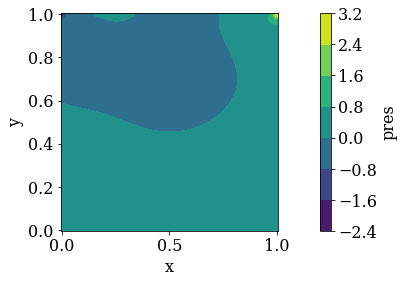

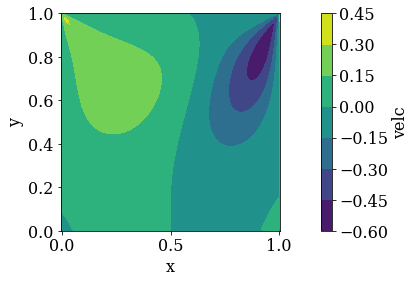

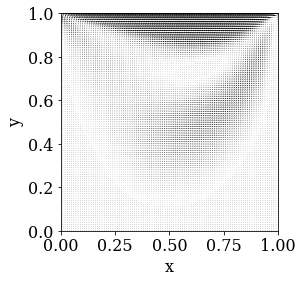

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')
gridc.get_error('eror','pres','asol')

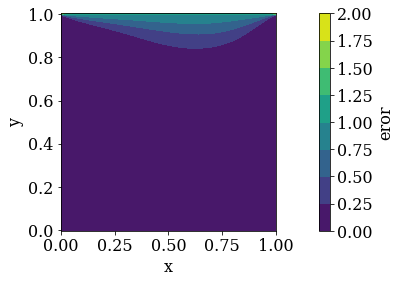

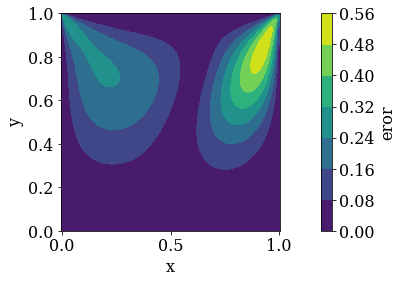

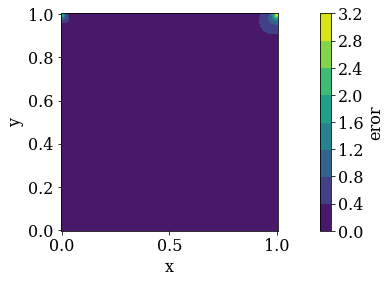

In [6]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')
flowx.io.plot_contour(gridc, 'eror')

In [7]:
gridx.get_values( 'velc' )[ int(nx/2), : ]

array([ 0.0037719 , -0.0037719 , -0.01097933, -0.01788562, -0.02452326,
       -0.03092221, -0.0371101 , -0.04311242, -0.04895268, -0.05465251,
       -0.06023179, -0.06570872, -0.07109989, -0.07642032, -0.08168348,
       -0.08690135, -0.09208435, -0.09724139, -0.10237981, -0.10750535,
       -0.11262213, -0.11773261, -0.12283749, -0.12793572, -0.1330244 ,
       -0.13809876, -0.1431521 , -0.14817576, -0.15315907, -0.15808938,
       -0.162952  , -0.16773028, -0.17240557, -0.17695736, -0.18136332,
       -0.1855994 , -0.18964001, -0.19345814, -0.1970256 , -0.20031323,
       -0.20329115, -0.20592903, -0.20819642, -0.21006307, -0.21149925,
       -0.21247614, -0.21296612, -0.21294322, -0.21238336, -0.21126476,
       -0.20956821, -0.20727734, -0.20437886, -0.20086276, -0.1967224 ,
       -0.19195465, -0.18655982, -0.18054168, -0.17390728, -0.16666675,
       -0.15883304, -0.15042159, -0.14144982, -0.13193671, -0.12190218,
       -0.11136643, -0.10034917, -0.08886886, -0.07694171, -0.06